### DELIVERABLE 1 (TASK 1)

- **Ensemble Learning**
- **Hyperparameter Optimization**



In [80]:
import numpy as np
import pandas as pd
import os
import glob

import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import randint

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score, ConfusionMatrixDisplay, roc_curve
sns.set(style='whitegrid')
import xgboost 
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [81]:
file_path = r"c:/Users/DELL/Desktop/Datasets/University Football Injury Prediction/data.csv"
if not os.path.exists(file_path):
    print ("File not found, check the path.")
else:
    try:
        encodings = ["utf-8", "latin-1", "ISO-8859-1"]
        delimiters = [",", ";", "\t", "|"]
        
        df = None 
        for enc in encodings:
            for delim in delimiters:
                try:
                    df=pd.read_csv(file_path, encoding=enc, delimiter=delim)
                    print (f" file opened successfully with encoding='{enc}' and delimiter='{delim}'")
                    print(df.head())

                    break
                except Exception:
                    continue
            if df is not None:
                break
        if df is None:
            print("Could not read the CSV with common encodings/delimiters.")
    except Exception as e:
        print (f"Error: {e}")
        
            

 file opened successfully with encoding='utf-8' and delimiter=','
   Age  Height_cm  Weight_kg    Position  Training_Hours_Per_Week  \
0   22        173         64  Midfielder                11.575308   
1   18        170         67  Midfielder                12.275869   
2   22        186         75     Forward                12.254896   
3   20        172         62    Defender                 9.006678   
4   18        172         94  Midfielder                12.683668   

   Matches_Played_Past_Season  Previous_Injury_Count  Knee_Strength_Score  \
0                          36                      1            77.460279   
1                          37                      2            72.634442   
2                          12                      2            77.064490   
3                          11                      1            82.810232   
4                          10                      2            76.772859   

   Hamstring_Flexibility  Reaction_Time_ms  Balance_Test

In [82]:
df.shape

(800, 19)

In [83]:
df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

In [85]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.135000,177.407500,73.235000,9.951150,22.332500,1.536250,74.933249,79.154123,249.423244,83.832337,5.949025,78.341311,7.417124,54.039342,74.382174,0.597500,0.500000,23.377364
std,1.991037,7.148974,9.929276,2.610395,10.311516,1.292584,6.672704,6.782332,22.532387,6.931657,0.329133,8.775418,0.793183,11.421143,9.324899,0.490708,0.500313,3.673279
min,18.000000,154.000000,45.000000,5.000000,5.000000,0.000000,52.391351,58.180381,180.000000,60.059484,4.862435,50.000000,5.000000,21.561186,50.000000,0.000000,0.000000,14.346326
25%,19.000000,173.000000,66.000000,8.127151,13.000000,1.000000,70.432656,74.495959,234.089585,79.044910,5.732552,72.675392,6.850062,45.775371,67.809084,0.000000,0.000000,20.786644
50%,21.000000,177.000000,73.000000,9.895710,22.000000,1.000000,74.997933,79.187909,249.127328,84.156236,5.937692,78.340973,7.424618,54.047208,74.363878,1.000000,0.500000,23.130560
75%,23.000000,182.000000,80.000000,11.535140,32.000000,2.000000,79.632391,83.813179,265.105082,88.877902,6.159205,84.093489,7.988100,61.910804,80.502613,1.000000,1.000000,26.024182
max,24.000000,200.000000,105.000000,18.866608,39.000000,8.000000,93.900051,100.000000,306.730851,100.000000,6.898228,100.000000,9.860553,87.065007,100.000000,1.000000,1.000000,36.262439


In [86]:
df.isna().sum()

Age                           0
Height_cm                     0
Weight_kg                     0
Position                      0
Training_Hours_Per_Week       0
Matches_Played_Past_Season    0
Previous_Injury_Count         0
Knee_Strength_Score           0
Hamstring_Flexibility         0
Reaction_Time_ms              0
Balance_Test_Score            0
Sprint_Speed_10m_s            0
Agility_Score                 0
Sleep_Hours_Per_Night         0
Stress_Level_Score            0
Nutrition_Quality_Score       0
Warmup_Routine_Adherence      0
Injury_Next_Season            0
BMI                           0
dtype: int64

In [87]:
df.duplicated().sum()

np.int64(0)

In [88]:
df['Injury_Next_Season'].value_counts()

Injury_Next_Season
0    400
1    400
Name: count, dtype: int64

### Exploratory Data Analysis 

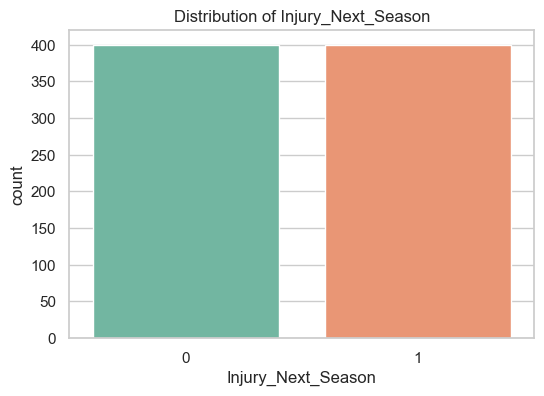

In [89]:
# 1. Distribution of target variable (Injury_Next_Season)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Injury_Next_Season', palette='Set2')
plt.title('Distribution of Injury_Next_Season')
plt.show()

##### Injury Next Season

- This is the target variable, and the countplot shows that this is balanced for modelling. 

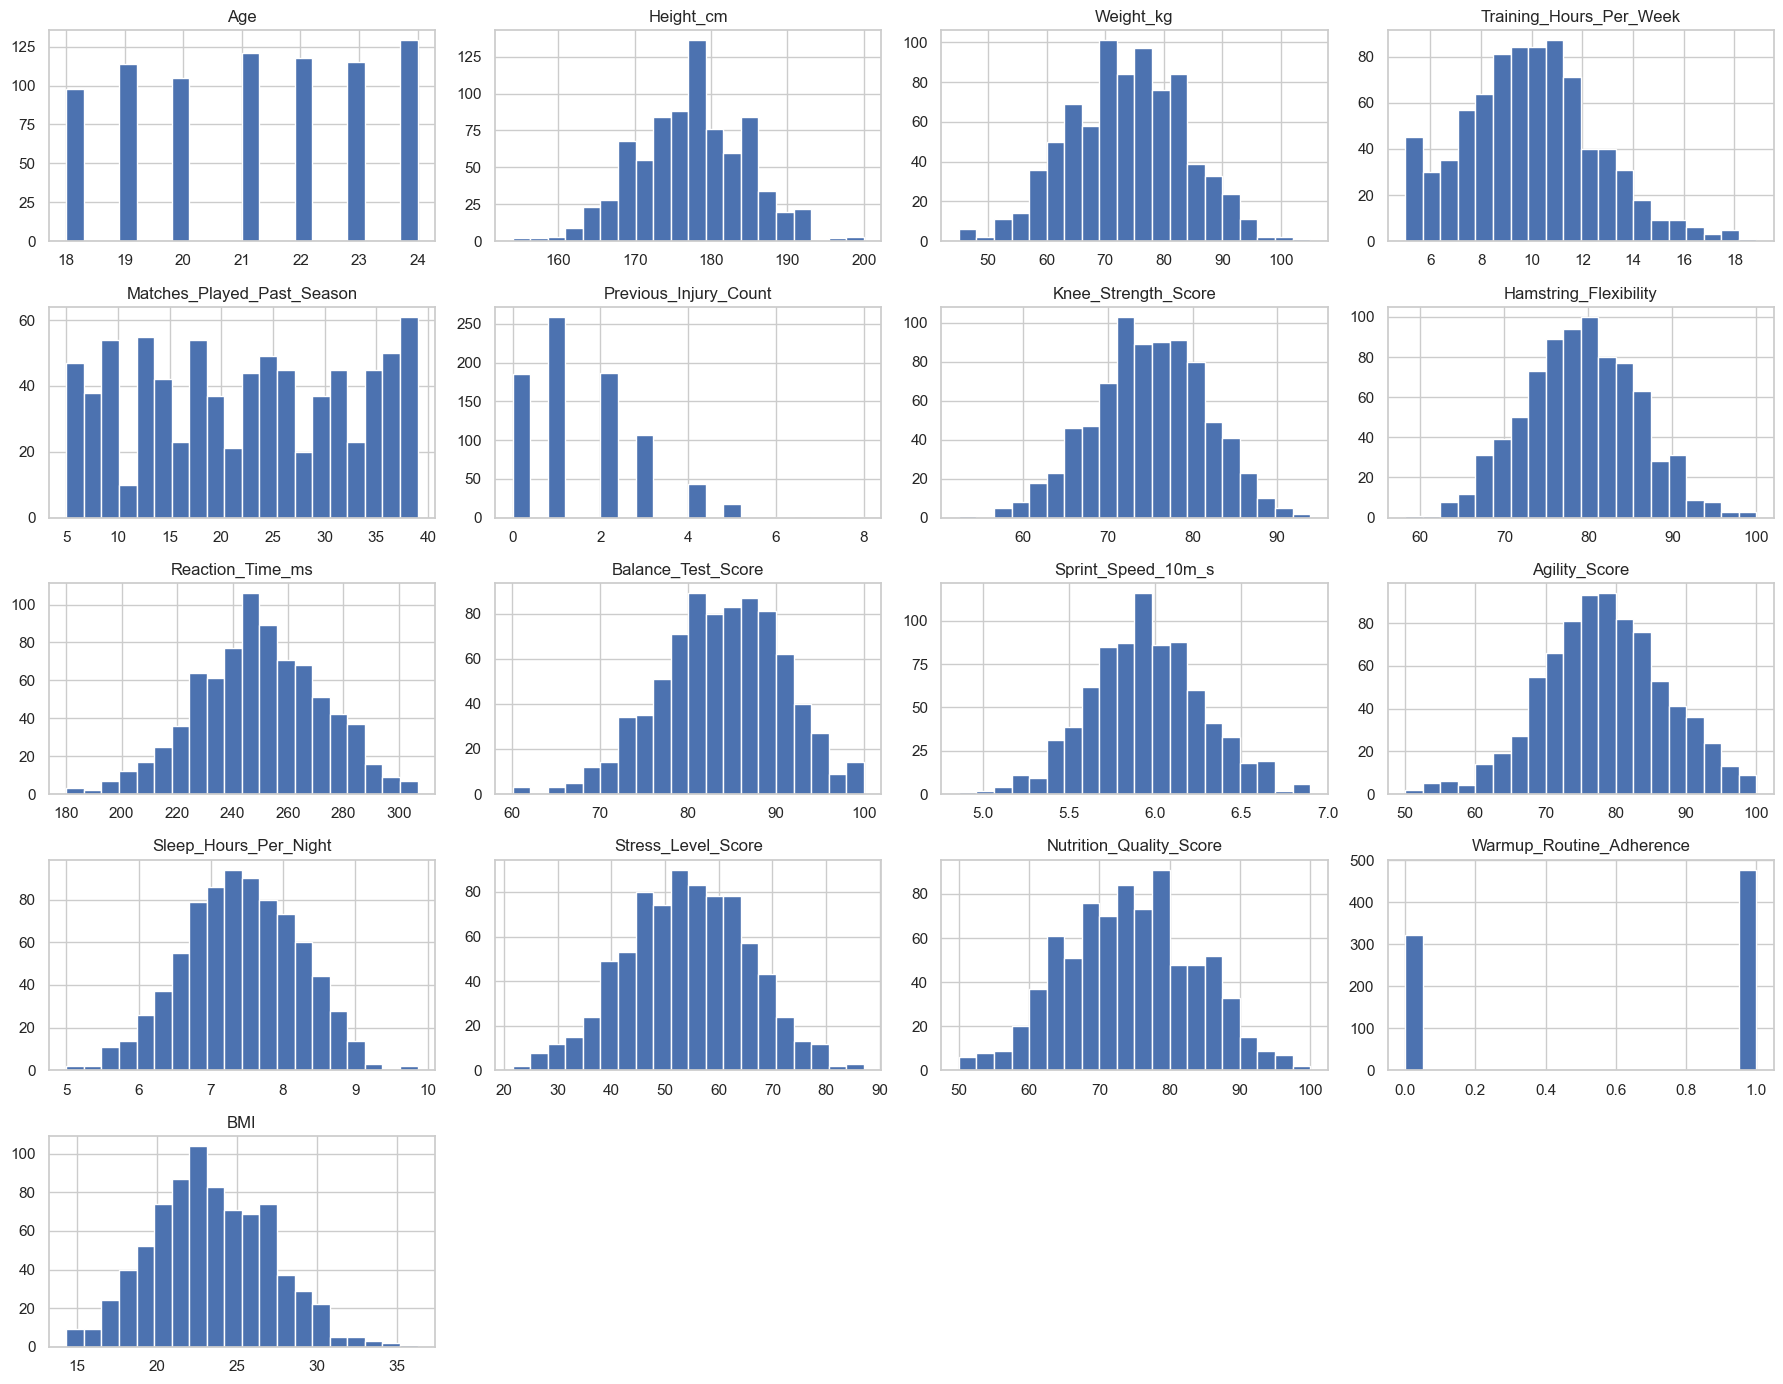

In [ ]:
# 2. Distribution of numerical features
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Injury_Next_Season')
df[numeric_cols].hist(figsize=(18, 14), bins=20, layout=(5, 4))
plt.tight_layout()
plt.show()

##### Distribution of Numerical columns

The histplot above shows the distribution of each numerical columns:

##### Physical Characteristics
**Age:**
    - It shows that the mean of the footballers age is 21 years, while the modal age is 24 years, and the age range from 18-24, which compliment that the footballers are typical university students
    - The implication of this is that injury prevention is even more critical because injuries at this stage can affect long-term career developments.
**Height_cm, Weight & BMI:**
    - They mostly have normal distributions, but BMI has some outliers > 30.
    - This indicates that most players fall in the healthy range, but some have are obese (BMI > 30). 
    Outlliers players with very high BMI may face higher injury risk(joint strain and slower recovery). The clubs should monitor their physical status. 

##### Football-Specific Metrics
**Training Hours per Week:** 
    - This indicates that players train differently, some nearly twice the hours of others training. 
    - Undertraining (poor conditioning) and Overtraining(fatigue) can increase injury risk. Workload balance is important. 
**Matches Played (mean aprrox. 22, range 5-39):**
    - Some players play almost 40 matches in a season, others play less than 10
    - High match load increases fatigue and injury risk; workload monitoring is needed to prevent burnout and wornout.
**Previous Injuries (mean approx. 1.5, modal= 8):**
    - Most players had in between 0-2 injuries, but quite a few are highly injury-prone. 
    - Prior injury is a major disadvantage; players with past multiple injuries need specialzed rehabilitation and apt management. This also outlines the importance of injury history tracking in player management and prevention strategies. 

##### Physical Fitness Assessment 
**Knee Strength (mean approx. 75/100):**
    - The players are strong overall, but some are low performers (<60).
    - Low strength correlates with higher risk of ligament and muscle injuries. 
**Hamstring Flexibility (mean approx. 79/100):**
    - Majority are flexible, but some are at lower range (approx. 58)
    - Limited flexibility is a common precursor to strains.
**Reaction Time (mean approx. 249ms):**
    - The range is within athletic norms, but slower players (>280ms) could be less responsive in play situations. 
**Balance (mean approx. 84/100):**
    - This is generally high, but weak balance (<65) may increase knee/ankle injury risk.
**Sprint Speed:** 
    - Faster athletes (approx. 4.9s) are explosive, slower ones (aprrox. 6.9s) may struggle in a competitive play. 
**Agility (mean approx. 78/100):**
    - This is wide spread amongst the players, a player with low agility could be exposed to awkard movements and injuries. 
##### Poor conditioning directly contributes to injury vulnerability, clubs should emphasize and monitor strength, hamstring flexibility, reaction time and agility in injury-prevention program. 

##### Lifestyle Factors
**Sleep (mean approx. 7.4hrs, range 5-10hrs):**
    - This is mostly adequate, but some players have less than <6hrs sleep and linked to fatigue and injuries.
**Stress (mean approx. 54/100, range 21-87):**
    - There is a wide variations of the stress level; high stress is a risk factor for both physical and psychological performance decline. 
**Nutrition Quality (mean approx. 74/100):**
    - This is generally good, but low scorers (approx. 50) may lack recovery nutrients. 
##### Lifestyle factors are non-neglible. Teams should adopt holistic player wellness programs (sleep hygiene, stress management, nutrition plans)

##### Training Compliance
**WWarm-up routine adherence (60% yes, 40% no):**
    - There is a significant minority that skips warmups, directly linked to higher injury rates.  
    - Simple, low-cost interventions like enforcing warmup adherence can drastically reduce injuries. Coaches should monitor pre-training routine.

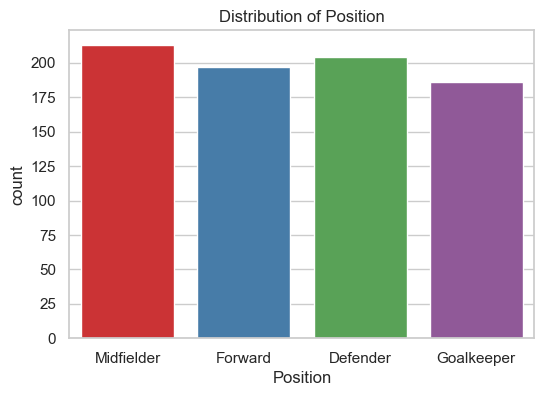

In [ ]:
# 3. Distribution of categorical features
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set1')
    plt.title(f'Distribution of {col}')
    plt.show()


#### Position Countplot

The position chart visualizes the distribution of football players across different playing positions (i.e, Midfielder, Forward, Defender, Goalkeeper) in the dataset. It reveals that the positions are well distributed amongst the players.

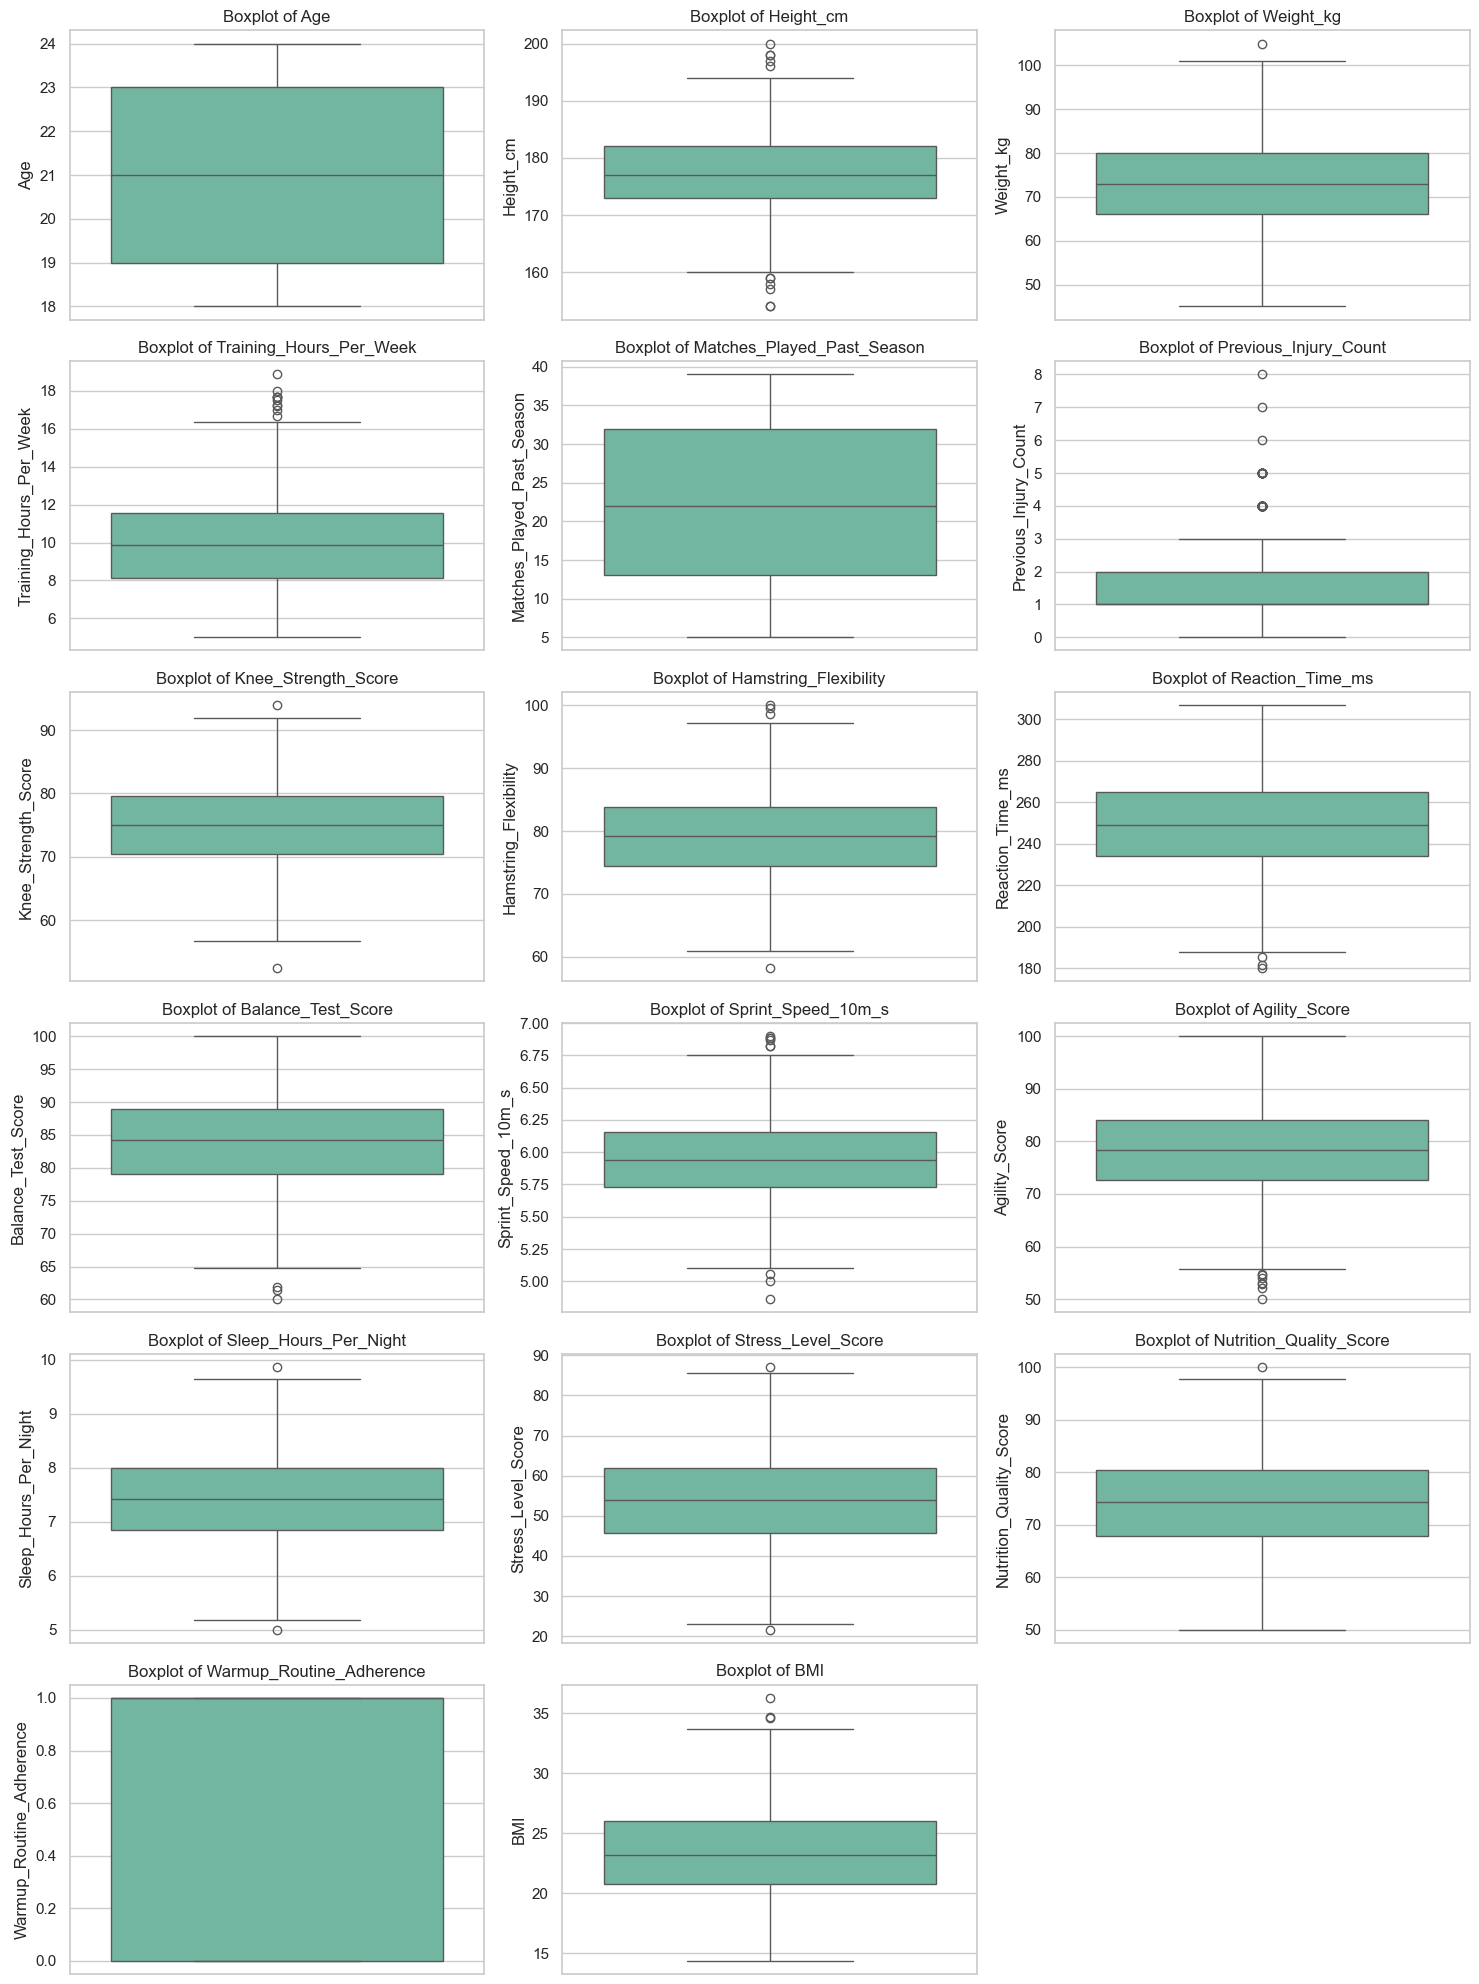

In [ ]:
# 4. Boxplots for outlier detection
# Plotting the boxplots in a 6rows by 3 columns. 
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f"Boxplot of {col}")
# Extra box removal
for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Boxplot Interpretation & Indications

The boxplots for each numerical feature help visualize the spread, central tendency, and outliers in the data. Here are the key interpretations and indications:

- **Age, Height_cm, Weight_kg:**  
    Most values are concentrated around the median, with few outliers. Outliers in age may indicate older/younger players who could have different injury risks. Extreme weights or heights may affect physical performance and injury susceptibility.

- **Training_Hours_Per_Week, Matches_Played_Past_Season:**  
    Some players train or play significantly more than others (visible as outliers). Overtraining or excessive match load can increase fatigue and injury risk, while undertraining may lead to poor conditioning.

- **Previous_Injury_Count:**  
    Outliers represent players with a history of multiple injuries. These individuals are at higher risk for future injuries and may require specialized management.

- **Knee_Strength_Score, Hamstring_Flexibility, Balance_Test_Score, Agility_Score:**  
    Outliers on the lower end suggest some players have poor strength, flexibility, balance, or agility. These physical deficiencies are linked to increased injury risk and highlight the need for targeted training and rehabilitation.

- **Reaction_Time_ms, Sprint_Speed_10m_s:**  
    Outliers with slow reaction times or sprint speeds may be less responsive or explosive, potentially impacting performance and injury risk.

- **Sleep_Hours_Per_Night, Stress_Level_Score, Nutrition_Quality_Score:**  
    Outliers indicate players with poor sleep, high stress, or low nutrition quality. These lifestyle factors can negatively affect recovery and increase injury risk.

- **Warmup_Routine_Adherence:**  
    Outliers (players not adhering to warmup routines) are at higher risk for preventable injuries.

- **BMI:** 
    Outliers with high BMI may be overweight or obese, which is associated with joint stress and slower recovery.
    
**Indications:**  
- Outliers should be investigated further, as they may represent players at higher risk for injury.
- Clubs should monitor and address physical, training, and lifestyle factors to reduce injury risk.
- Targeted interventions (e.g., strength/flexibility programs, workload management, wellness initiatives) can help mitigate risks identified in the boxplots.

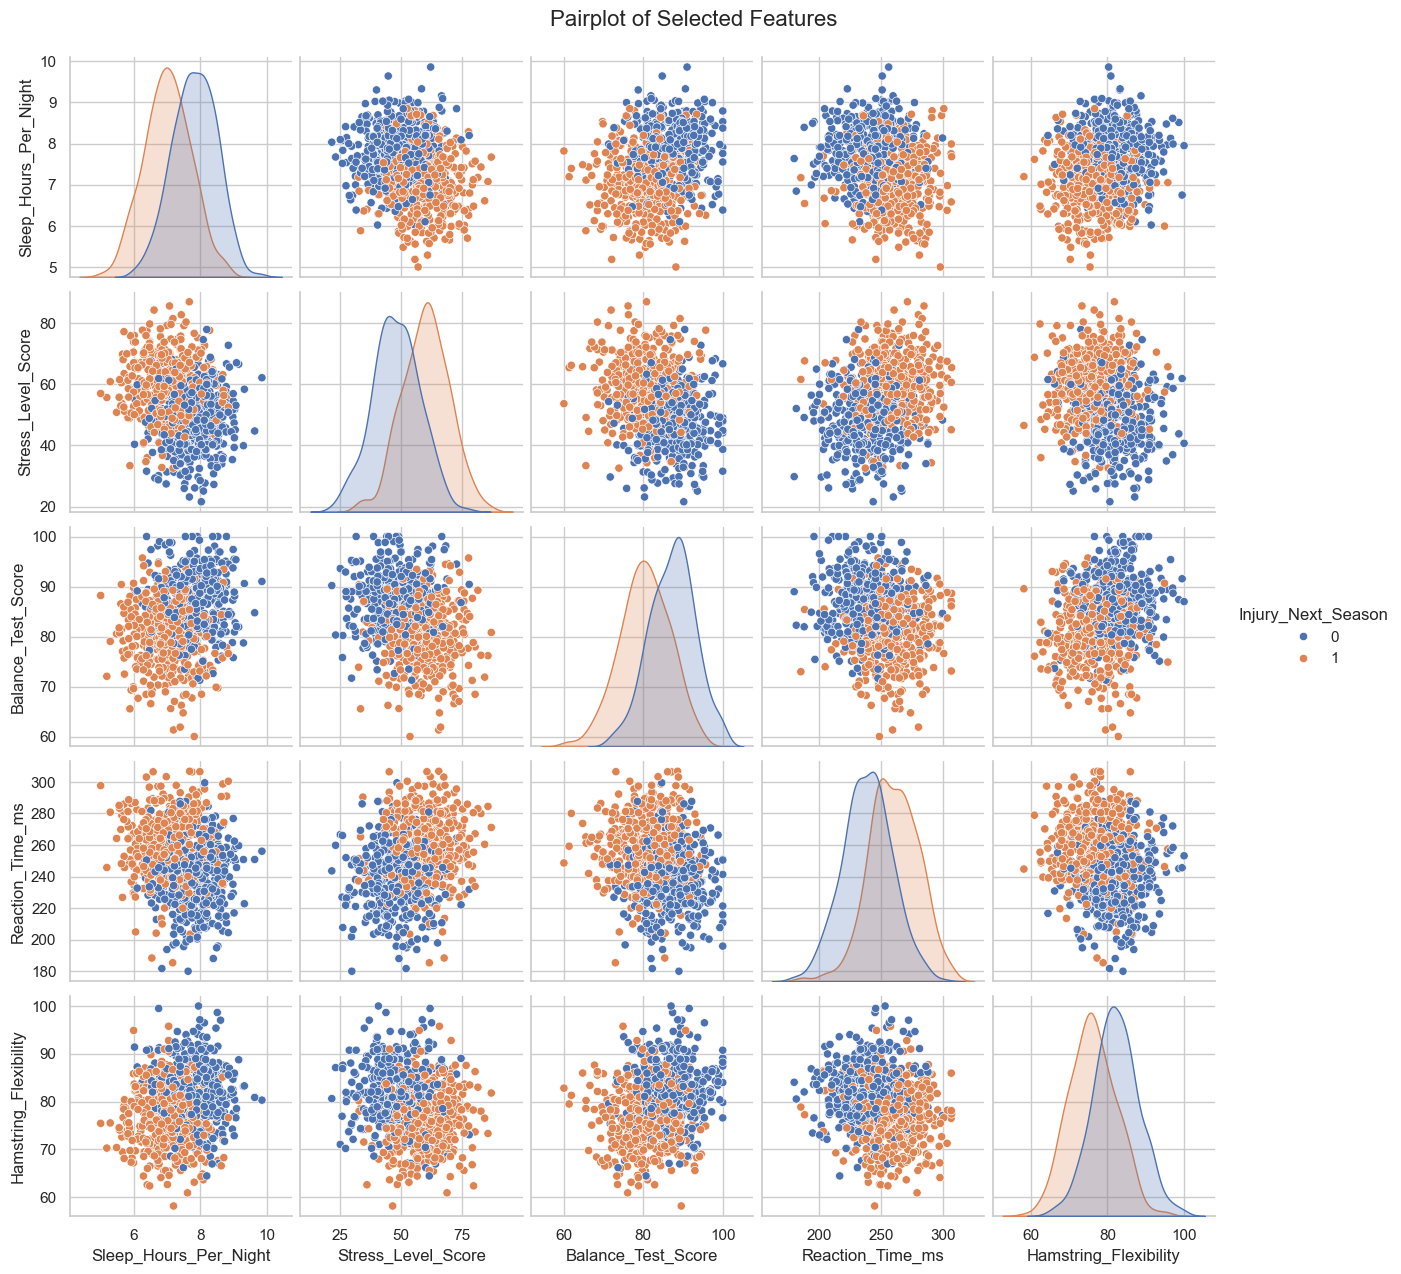

In [ ]:
# 5. Pairplot for selected features based on the random forest importance
selected_features = ['Sleep_Hours_Per_Night', 'Stress_Level_Score', 'Balance_Test_Score', 'Reaction_Time_ms', 'Hamstring_Flexibility', 'Injury_Next_Season']
g = sns.pairplot(df[selected_features], hue='Injury_Next_Season')

g.fig.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16, ha='center')
plt.show()

#### Pairplot Interpretation & Indications

The pairplot visualizes relationships between selected features (Sleep_Hours_Per_Night, Stress_Level_Score, Balance_Test_Score, Reaction_Time_ms, Hamstring_Flexibility) and the target variable (Injury_Next_Season). The selected features have been ranked the first 5 according to random forest important variables: 

- **Sleep_Hours_Per_Night/Injury_Next_Season:**  
    Players with fewer sleep hours tend to have a higher incidence of injury. Adequate sleep is important for recovery and injury prevention.

- **Stress_Level_Score/Injury_Next_Season:**  
    Higher stress levels are associated with more injuries. Managing stress can help reduce injury risk.

- **Balance_Test_Score/Injury_Next_Season:**  
    Lower balance scores are more common among injured players. Good balance is protective against injuries.

- **Reaction_Time_ms/Injury_Next_Season:**  
    Slower reaction times are linked to higher injury rates. Improving reaction time may help reduce injuries.

- **Hamstring_Flexibility/Injury_Next_Season:**  
    Players with lower flexibility scores are more likely to be injured. Flexibility training is beneficial.

**Indications:**  
- Physical fitness and lifestyle factors (sleep, stress, balance, reaction time, flexibility) are important predictors of injury risk.
- Targeted interventions to improve sleep, manage stress, enhance balance, reaction time, and flexibility could help reduce injuries.
- Monitoring these features can guide personalized injury prevention strategies for players.

### Correlation Heatmap

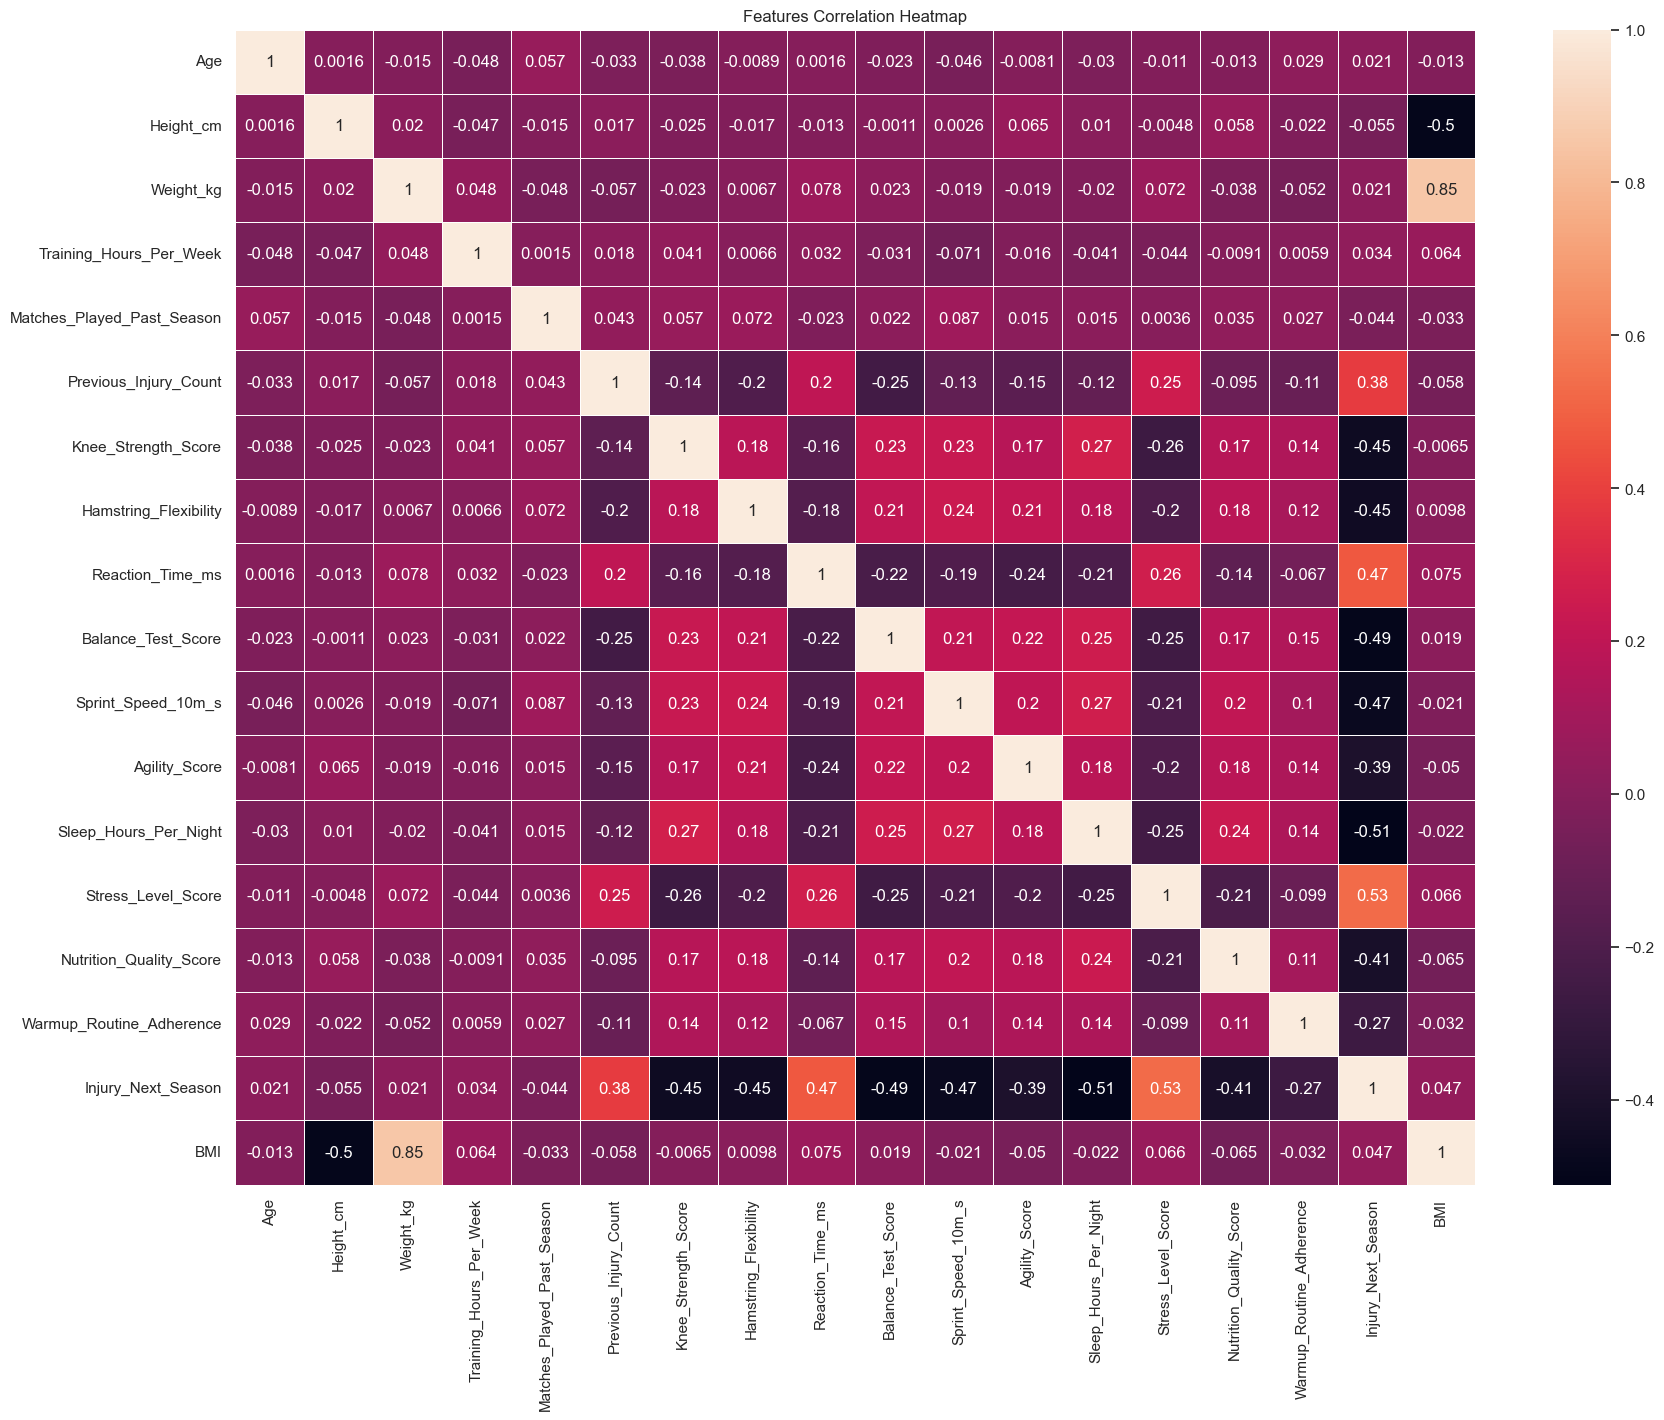

In [94]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrx = numeric_df.corr()

#Masking upper triangle
#mask=np.triu(np.ones_like(corr_matrx, dtype=bool))

#Visualization
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrx, annot=True, linewidths=0.5)
plt.title('Features Correlation Heatmap')

plt.show()

### ML Preprocessing

In [95]:
le = LabelEncoder()

df['Position'] = le.fit_transform(df['Position'])

In [96]:
df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,3,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,3,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,1,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,0,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,3,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


In [97]:
x = df.drop(columns=['Injury_Next_Season'])

y = df['Injury_Next_Season']

In [98]:
scaler = StandardScaler()
scaledx = scaler.fit_transform(x)

scaledx

array([[ 4.34718651e-01, -6.16907727e-01, -9.30659768e-01, ...,
         7.60809045e-01,  8.20755851e-01, -5.43021429e-01],
       [-1.57554101e+00, -1.03681089e+00, -6.28333910e-01, ...,
         7.16219917e-01,  8.20755851e-01, -5.28396316e-02],
       [ 4.34718651e-01,  1.20267264e+00,  1.77868380e-01, ...,
        -1.01992128e+00, -1.21838912e+00, -4.62698309e-01],
       ...,
       [ 1.43984848e+00,  6.42801756e-01,  1.77868380e-01, ...,
        -2.73390204e-04, -1.21838912e+00, -2.00265551e-01],
       [-5.70411178e-01,  1.48260808e+00,  1.28639653e+00, ...,
        -4.35859693e-01,  8.20755851e-01,  2.60124517e-01],
       [ 4.34718651e-01,  1.20267264e+00, -2.36821923e-02, ...,
        -6.72408894e-01, -1.21838912e+00, -6.20176980e-01]],
      shape=(800, 18))

In [99]:
#Model Training using Train Test Splitting 

X_train, X_test, y_train, y_test = train_test_split(scaledx, y, test_size=0.2, random_state=42)

### Random Forest Classifier Model

In [100]:
#Model fitting
forest = RandomForestClassifier(random_state=42)

forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        80
           1       0.93      0.96      0.94        80

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160



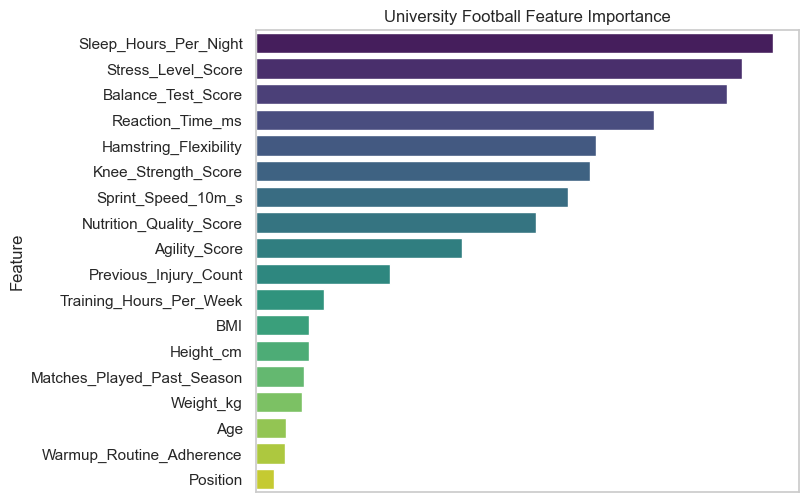

In [101]:
importances =forest.feature_importances_

features = x.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance':importances})

importances_df.sort_values(by="Importance", ascending=False, inplace=True)
#importances_df

#Plot
plt.figure(figsize=(7,6))
sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')
plt.title('University Football Feature Importance')

#Hide scale
plt.xlabel("")
plt.xticks([])
plt.show()


#### Random Forest provides robust predictions and highlights key injury risk factors (e.g., Sleep, Stress, Balance, Reaction Time, Flexibility). These should be prioritized in player monitoring and prevention programs.


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Optimized Random Forest Classifier:
Accuracy: 0.94375
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        80
           1       0.92      0.97      0.95        80

    accuracy                           0.94       160
   macro avg       0.95      0.94      0.94       160
weighted avg       0.95      0.94      0.94       160



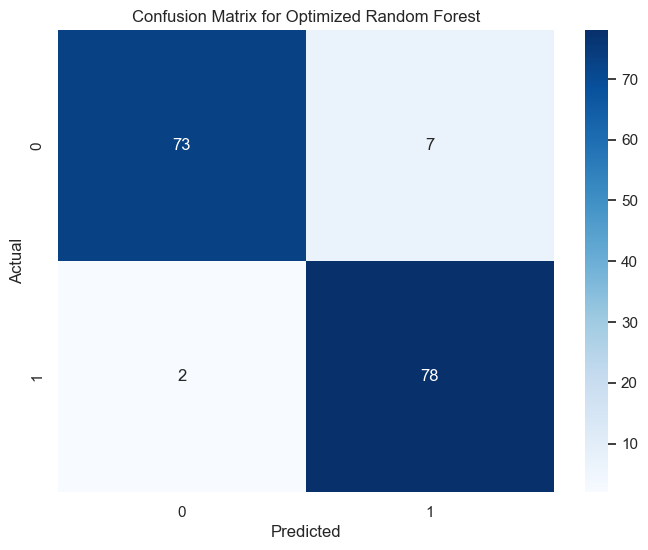

In [102]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV

rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# Evaluate optimized Random Forest
y_test_rf_pred = best_rf.predict(X_test)
print("Optimized Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_test_rf_pred))

print("Classification Report:\n", classification_report(y_test, y_test_rf_pred))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_test_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Optimized Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Optimized Hyperparameter tuning further improves model performance. Clubs should use optimized models for more reliable injury predictions and risk stratification.
#### Confusion Matrix
- True Negatives (TN): 73
- False Positives (FP): 7
- False Negatives (FN): 2
- True Positives (TP): 78
- Accuracy: 0.944
- Precision: 0.918
- Recall (Sensitivity): 0.975
- Specificity: 0.912
Indications:
- High TN and TP indicate good discrimination between injured and non-injured players.
- Low FP and FN are desirable; high FP means over-predicting injuries, high FN means missing actual injuries.
- Clubs should focus on models with high recall to minimize missed injury cases.
- Precision is important to avoid unnecessary interventions for healthy players.

### Gradient Boosting Classifier Model


Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        80
           1       0.94      0.93      0.93        80

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': np.int64(120), 'min_samples_leaf': np.int64(5), 'max_features': 'log2', 'max_depth': np.int64(2), 'learning_rate': np.float64(0.1788888888888889)}
Best CV score: 0.95


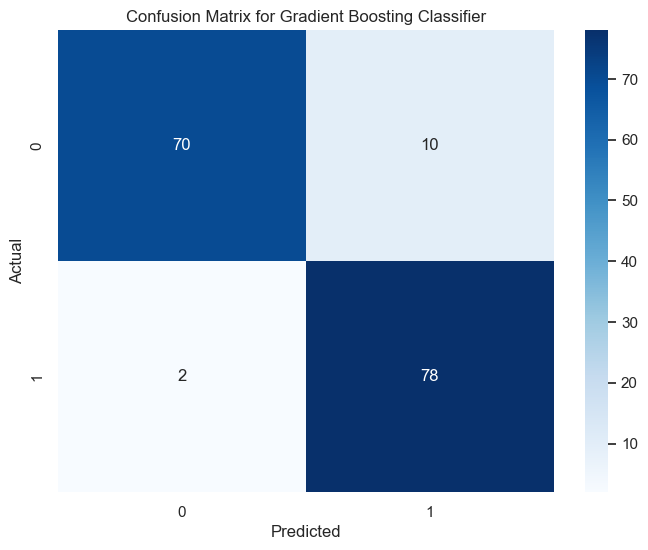

In [103]:
#Model fitting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gbc_pred))

#Hyperparameters tuning
gbc_param_dist ={
    "n_estimators": np.arange(100, 500, 5),
    "learning_rate": np.linspace(0.01, 0.2, 10),
    "max_depth": np.arange(2,8),
    "min_samples_leaf": np.arange(1, 10),
    "max_features": ["sqrt", "log2", None]
}

gbc_random_search = RandomizedSearchCV(estimator=gbc, param_distributions=gbc_param_dist, cv=5, n_iter=50,
                                        n_jobs=-1, scoring='accuracy', random_state=42, verbose=1)
gbc_random_search.fit(X_train, y_train)

gbc_pred_h = gbc_random_search.predict(X_test)
print('Best Parameters:', gbc_random_search.best_params_)
print('Best CV score:', gbc_random_search.best_score_)


# Confusion matrix
cm_gbc = confusion_matrix(y_test, gbc_pred_h)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Gradient Boosting is effective for capturing complex feature interactions. It confirms the importance of physical and lifestyle factors in injury risk.

#### Confusion Matrix
- True Negatives (TN): 70
- False Positives (FP): 10
- False Negatives (FN): 2
- True Positives (TP): 78
- Accuracy: 0.925
- Precision: 0.886
- Recall (Sensitivity): 0.975
- Specificity: 0.875
Indications:
- Low FP and FN are desirable; high FP means over-predicting injuries, high FN means missing actual injuries.
- Clubs should focus on models with high recall to minimize missed injury cases.
- Precision is important to avoid unnecessary interventions for healthy players.

### Voting Classifier Model 

Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        80
           1       0.94      0.96      0.95        80

    accuracy                           0.95       160
   macro avg       0.95      0.95      0.95       160
weighted avg       0.95      0.95      0.95       160



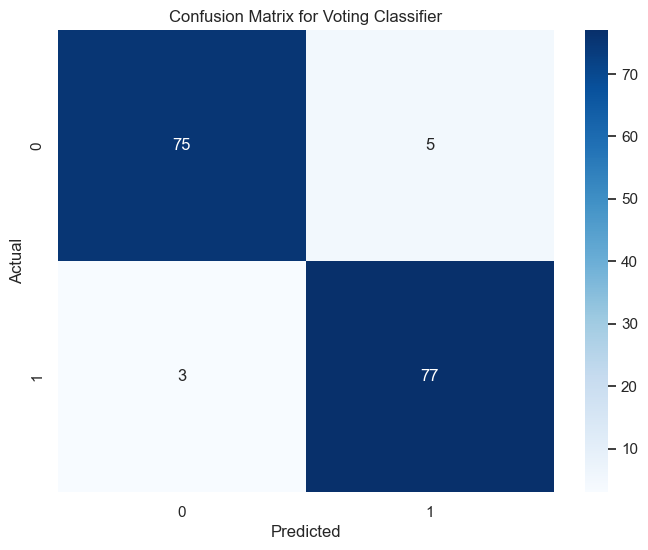

In [104]:
#Model fitting
voting_clf = VotingClassifier(
    estimators=[
        ('rf', forest),
        ('gbc', gbc),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
print("Voting Classifier Report:")
print(classification_report(y_test, voting_pred))

# Confusion matrix
cm_vp = confusion_matrix(y_test, voting_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Combining multiple models (ensemble) yields strong predictive performance. This approach reduces individual model bias and improves reliability for injury prediction.


### Testing Models with Cross-Validation

In [105]:
# Cross validation with Random Forest 
forest_cv_scores = cross_val_score(forest, scaledx, y, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy Scores:", forest_cv_scores)
print("Random Forest Mean CV Accuracy:", forest_cv_scores.mean())

# Cross-validation with SVM
svm_model = SVC(probability=True, random_state=42)
svm_cv_scores = cross_val_score(svm_model, scaledx, y, cv=5, scoring='accuracy')
print("SVM Cross-Validation Accuracy Scores:", svm_cv_scores)
print("SVM Mean CV Accuracy:", svm_cv_scores.mean())
print("SVM performs well and can be used for injury prediction, especially when feature space is well-scaled.")

# Cross-validation with XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, scaledx, y, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy Scores:", xgb_cv_scores)
print("XGBoost Mean CV Accuracy:", xgb_cv_scores.mean())
print("XGBoost is highly competitive for tabular data and confirms the predictive value of the selected features.\nIt is suitable for deployment in injury risk assessment systems.")

Random Forest Cross-Validation Accuracy Scores: [0.93125 0.93125 0.96875 0.875   0.93125]
Random Forest Mean CV Accuracy: 0.9275
SVM Cross-Validation Accuracy Scores: [0.93125 0.9375  0.975   0.93125 0.9625 ]
SVM Mean CV Accuracy: 0.9475
SVM performs well and can be used for injury prediction, especially when feature space is well-scaled.
XGBoost Cross-Validation Accuracy Scores: [0.9125  0.9375  0.94375 0.9125  0.93125]
XGBoost Mean CV Accuracy: 0.9275
XGBoost is highly competitive for tabular data and confirms the predictive value of the selected features.
It is suitable for deployment in injury risk assessment systems.


#### Conclusion 

- All models consistently identify sleep, stress, balance, reaction time, and flexibility as top predictors.
- Ensemble and optimized models should be preferred for deployment due to their superior accuracy and reliability.
- Clubs should focus on these areas for targeted and precised interventions.